<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/bozzato/Lab-3/bozzato_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3: Iterative methods**
**Bozzato Federico**

# **Abstract**

In this lab we deepen the problem of solving systems of equations, both linear and nonlinear. There will be presented three methods for solving systems of linear equations, one for solving nonlinear equations and another method for systems of nonlinear equations.

#**About the code**

**Author:** Federico Bozzato

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import sys
import math
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

# **Introduction**

Iterative methods differ from direct methods because they do not need a specific number of steps to complete as the direct methods need [1]. The way the iterative methods operate is to reduce the approximation error in each iteration, but they need a convergence criterion in order to stop when a certain condition is reached.

This report is divided into three parts:

1. Methods: in this section, each algorithm is presented and explained, giving also the mathematic definition of the operation the algorithm implements.

2. Results: in this section, the results of each algorithm are presented.

3. Discussion: in this last section, results are discussed.



# **Methods**

This section is divided into two subsection: the mandatory part and the extra assignment.

## Mandatory assignment

###1. Jacobi iteration
Jacobi method is an iterative method for determining the solution of a diagonally dominant system of linear equations [2].

####Definition
Given the system $Ax=b$, where $A\in\mathbb{R}^{n\times n}$ and $x,b\in\mathbb{R}^n$, Jacobi iteration consists firstly in splitting the matrix $A$ into two matrix $D$ and $E$ such that

>$
D= \text{diag}(A) \qquad \& \qquad E= A-D
$

Thus, the system can be rewritten as 

>$
  (D + E)x=b \Longrightarrow Dx= -Ex + b
$

from which we can get the iteration step given by

>$
 x^{(k+1)}= -D^{-1}Ex^{(k)} + D^{-1}b=Mx^{(k)}+c
$

where $M$ is called *iteration matrix*.

####Convergence
The convergence is reached if the spectral radius is lower than 1, or

>$
\rho(M) < 1 \quad \Longleftrightarrow \quad \rho\left(-D^{-1}\left(A-D\right)\right) < 1
$

A sufficient (but not necessary) condition for the method to converge is that the matrix $A$ is strictly diagonally dominant [2], which means

>$
|a_{ii}| > \displaystyle \sum_{i\ne j}^n |a_{ij}|
$

In case the matrix is not strictly diagonally dominant, it might be possible to make it strictly diagonally dominant by applying a permutation to the system $Ax=b$. The permutation does not change the solution of the systems because the system can be rewritten as

>$
 Ax = b \quad \Longrightarrow \quad PAx = Pb
$

where $P\in\mathbb{R}^{n\times n}$ is the permutation matrix.

Clearly applying the permutation matrix does not guarantee the convergence of the method, since the condition of being strictly diagonally dominant is not necessary, but it is an approach that can be used to modify the system without changing its solutions.

####Implementation
The algorithm for implementing the Jacobi method is very simple, since all we need to do is to follow the mathematical steps presented in the above section. The algorithm below is written in pseudocode



```
norm_b= norm(b)
x(0) = initialPoint
while (res / nomr_b) > tolerance do:
  x(k+1) = M*x(k) + c
  
  res = ||b - A*x(k+1)||
```

In my implementation I have also inserted a control for assuring that the matrix $A$ given in the input has the spectrum radius lower than $1$: if the matrix $A$ does not have the spectrum radius lower than $1$, then the matrix undergoes a permutation in order to make it, if possible, diagonally dominant. 
The pseudocode for the permutation is the following one:


```
indeces = list()
for i = 1, ..., n do:
  ind = argmax(|A[:,i]|)
  indeces[i] = ind
  
for i = 1, ..., n do:
  if i not in indeces then:
    indeces.append(i)
    
perm_matrix = zeros(n,n)
for i = 1, ..., n do:
  perm_matrix[indeces[i], i] = 1
```

As we can see, it might happen that more than one row in the matrix $A$ could be mapped into the same row in the new matrix: in order to avoid this, these rows are mapped into other rows. For example, we can consider the matrix

>$
\begin{pmatrix}
 -1 & 0 & 4 \\
 2 & -1 & 0 \\
 -2 & 1 & 5 
\end{pmatrix}
$

The first and the third rows have the highest value at the same position, so following the permutation these two rows should be moved both to the last row in the new matrix, but obviously this is impossible. Therefore, the first row is moved correctly to the third row, the second rows is moved to the first row and the the third row is moved in the only row which is still free, that is the second. Thus, the new matrix is

>$
\begin{pmatrix}
 2 & -1 & 0 \\
 -2 & 1 & 5 \\
 -1 & 0 & 4
\end{pmatrix}
$

In [0]:
def jacobiIteration(matrixA, b, initialPoint, tol=1e-5):
  '''
  Solves the system of linear equations matrixA * x = b, using the Jacobi
  iteration.
  Parameters:
  - matrixA: n x n matrix
  - b: n x 1 vector
  - initialPoint: starting guess for the iteration
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: n x 1 vector, solution of matrixA * x = b
  - residuals: vector containing all the residuals for each iteration
  - wres: normalized residuals
  
  '''
  ############################################
  ##           ITERATION MATRIX             ##
  ############################################
  def iterationMatrix(matrixA,b):                                               
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA) 
    
    D= np.diag(matrixA)
    invD= np.diag([1/D[i] for i in range(0,matrixA.shape[0])])
    D= np.diag(D)
    E= matrixA - D
    M= -np.dot(invD,E)
    
    return M, D, E, invD
  
  ############################################
  ##           PERMUTATION MATRIX           ##
  ############################################
  def permutation(matrixA):                                      
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA)  
    
    indeces= []
    n= matrixA.shape[0]
    for i in range(0,n):
      ind= np.argmax(np.absolute(matrixA[i,:]))         # the permutation is done
      if ind not in indeces:                            # in order to obtain a
        indeces.append(ind)                             # diagonally dominant matrix 

    for i in range(0,n):
      if i not in indeces:
        indeces.append(i)

    perm= np.zeros((n,n))
    for i in range(0,len(indeces)):
      perm[indeces[i],i]= 1

    return perm

   
  ############################################
  ##            JACOBI ITERATION            ##
  ############################################
  if not isinstance(matrixA,np.ndarray):
    matrixA= np.array(matrixA)
    
  n= matrixA.shape[0]
  
  # M = -invD * (A - D) = -invD * E
  # D = diag(A)
  # E = A - D
  # c = invD * b
  M, D, E, invD= iterationMatrix(matrixA,b)
  c= np.dot(invD,b)
    
  
  # convergence if rho(M)<1
  eigvals,_= np.linalg.eig(M)
  
  if np.around(max(np.absolute(eigvals))) >= 1:         # rho(M) >= 1
    perm= permutation(matrixA)                          # try to permutation of matrixA
                                                        # in order to get a diagonally
    matrixA= np.dot(perm,matrixA)                       # dominant matrix
    b= np.dot(perm,b)

    M, D, E, invD= iterationMatrix(matrixA,b)           # calculate again M, ...
    c= np.dot(invD,b)

    eigvals,_= np.linalg.eig(M)                         # new eigenvalues BUT THE 
                                                        # SOLUTIONS OF THE SYSTEM
                                                        # DON'T CHANGE
    
    if np.around(max(np.absolute(eigvals))) >= 1:
      print('Convergence will not be reached because rho(I-invD*A)>=1.\nTry other methods.')
      sys.exit(1)

  # we are sure that the algorithm converges. Now we can find x
  x= initialPoint
  res = b - np.dot(matrixA,x)    
  res= linalg.norm(res)
  norm_b= linalg.norm(b)
  residuals= []
  it= 1
  while res/norm_b > tol:
    x= np.dot(M,x) + c
    
    res = b - np.dot(matrixA,x)    
    res= linalg.norm(res)
    residuals.append(res)
    it+= 1
  
  print('solution after {} iterations'.format(it))
  return x, np.array(residuals), np.array(residuals / norm_b)

###2. Gauss-Seidel iteration

In [0]:
def gaussSeidelIteration(matrixA ,b, initialPoint, tol=1e-5):
  '''
  Solves the system of linear equations matrixA * x = b, using the Gauss - Seidel
  iteration.
  Parameters:
  - matrixA: n x n matrix
  - b: n x 1 vector
  - initialPoint: starting guess for the iteration
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: n x 1 vector, solution of matrixA * x = b
  - residuals: vector containing all the residuals for each iteration
  - wres: normalized residuals
  '''
  
  ############################################
  ##           ITERATION MATRIX             ##
  ############################################
  def iterationMatrix(matrixA):
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA) 
    
    # split matrixA= L + U
    L= np.tril(matrixA)
    U= np.triu(matrixA,1)
    
    invL= linalg.inv(L)
    M= -np.dot(invL,U)
    
    return M, L, U, invL
  
  ############################################
  ##           PERMUTATION MATRIX           ##
  ############################################
  def permutation(matrixA):                                      
    if not isinstance(matrixA,np.ndarray):
      matrixA= np.array(matrixA)  
    
    indeces= []
    n= matrixA.shape[0]
    for i in range(0,n):
      ind= np.argmax(np.absolute(matrixA[i,:]))         # the permutation is done
      if ind not in indeces:                            # in order to obtain a
        indeces.append(ind)                             # diagonally dominant matrix 

    for i in range(0,n):
      if i not in indeces:
        indeces.append(i)

    perm= np.zeros((n,n))
    for i in range(0,len(indeces)):
      perm[indeces[i],i]= 1

    return perm
  
  ############################################
  ##       GAUSS - SEIDEL ITERATION         ##
  ############################################
  if not isinstance(matrixA,np.ndarray):
    matrixA= np.array(matrixA)
  
  n= matrixA.shape[0]
  
  # M = -invL * (A - L) = -invL * U
  # L = lowerTriangular(A)
  # U = A - L
  # c = invL * b
  M, L, U, invL= iterationMatrix(matrixA)
  c= np.dot(invL,b)
  
  # convergence if rho(M)<1
  eigvals,_= np.linalg.eig(M)
  if np.around(max(np.absolute(eigvals))) >= 1:         # rho(M) >= 1
    perm= permutation(matrixA)                          # try to permutation of matrixA
                                                        # in order to get a diagonally
    matrixA= np.dot(perm,matrixA)                       # dominant matrix
    b= np.dot(perm,b)

    M, L, U, invL= iterationMatrix(matrixA)             # calculate again M, ...
    c= np.dot(invL,b)

    eigvals,_= np.linalg.eig(M)                         # new eigenvalues BUT THE 
                                                        # SOLUTIONS OF THE SYSTEM
                                                        # DON'T CHANGE
  
    
    if np.around(max(np.absolute(eigvals))) >= 1:
      print('Convergence will not be reached because rho(I-invD*A)>=1.\nTry other methods.')
      sys.exit(1)

    
  # we are sure that the algorithm converges. Now we can find x
  x= initialPoint
  residuals= []
  res = b - np.dot(matrixA,x)    # initial residual -> just to enter in the loop
  res= linalg.norm(res)
  norm_b= linalg.norm(b)
  it= 1
  while res/norm_b > tol:
    x= np.dot(M,x) + c
    
    res = b - np.dot(matrixA,x)    
    res= linalg.norm(res)
    residuals.append(res)
    it+= 1
  
  print('solution after {} iterations'.format(it))
  return x, np.array(residuals), np.array(residuals / norm_b)
  

###3. Newton's method for scalar nonlinear equation

In [0]:
def derivative(fun,point):
  '''
  Calculates the first order derivative of the function @fun at the point @point.
  Parameters:
  - fun: function for which the 1st order derivative is wanted
  - point: point where to calculate the derivative
  Output:
  - derivative: central 1st order derivative
  '''
  return (fun(point+1) - fun(point-1)) / 2               # central derivative f'= (f(x+1) - f(x-1))/2




def newtonScalarNLeq(fun,point,tol= 1e-5):
  '''
  Solve the scalar nonlinear equation f(x) = 0, where f(x) is the function @fun.
  The method used is Newton's method.
  Parameters:
  - fun: function 
  - point: starting guess for the iteration
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: point x such that f(x)=0
  - residuals: vector containing all the residuals for each iteration
  '''
  
  
  if not callable(fun):
    print('Error: impossible to continue! Parameter @fun is not callable()')
    
  # loop until convergence is not reached
  residuals= []
  x= point
  res= np.absolute(fun(x))
  residuals.append(res)
  k= 1
  while res >= tol:
    alpha= derivative(fun,x)
    x= x - fun(x)/alpha
    res= np.absolute(fun(x))
    residuals.append(res)
    k+= 1
    
  print('solution after {} iterations'.format(k))
  return x, np.array(residuals)


## Extra assignment

###4. GMRES method

In [0]:
def GMRESiteration(matrixA, b, tol=1e-5):
  '''
  Solves the system of linear equations matrixA * x = b, using the GMRES
  iteration.
  Parameters:
  - matrixA: n x n matrix
  - b: n x 1 vector
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: n x 1 vector, solution of matrixA * x = b
  - residuals: vector containing all the residuals for each iteration
  - wres: normalized residuals
  '''
  
  ######################################
  ##             ARNOLDI              ##
  ######################################
  def arnoldiIteration(matrixA, Q, K):
    '''
    Gives a partial similarity transformation of matrixA into a Hessenberg 
    matrix.
    Parameters:
    - matrixA: n x n matrix
    - Q: orthogonal matrix of the previous step
    - K: k-th step of the iteration
    Output:
    - vect_h: new vector of the Hessenberg matrix
    - q: new vector of the orthogonal matrix
    '''
    if not isinstance(matrixA, np.ndarray):
      matrixA= np.array(matrixA)
    
    if not isinstance(Q, np.ndarray):
      Q= np.array(Q)
  
    vect_h= np.zeros((K+1,1))
    q= np.dot(matrixA, Q[:,K-1])  
    
    for k in range(0,K):
      vect_h[k]= np.inner(Q[:,k],q)
      q= q - vect_h[k]*Q[:,k]
      
    vect_h[K]= linalg.norm(q)
    q= q / vect_h[K]
  
    return vect_h, q
  
  ######################################
  ##              GMRES               ##
  ######################################
  if not isinstance(matrixA,np.ndarray):
    matrixA= np.array(matrixA)
    
  if not isinstance(b,np.ndarray):
    b= np.array(b)
  
  n= matrixA.shape[0]
  k= 1
  Q= np.zeros((n,1))
  Q[:]= b / linalg.norm(b)
  res_0= linalg.norm(b)
  res= res_0
  residuals= []
  residuals.append(res)
  
  while res / res_0 >= tol:
    h_new, q_new= arnoldiIteration(matrixA, Q, k)         # k-th step of Arnoldi iteration
    
    # UPDATE H: the new H is build by adding a new row and a new column to the 
    # previous one. The last column will be equal to the vector h_new calculated
    # by the Arnoldi iteration in the current step.
    if k == 1:
      H= h_new
    else:
      H_new= np.zeros((k+1,k))
      H_new[0:k,0:k-1]= H
      H_new[:,k-1]= h_new.T
      H= H_new
    
    
    ########### LEAST SQUARES ###############
    # least square of (|b|e_1 - H_ky)
    e_1= np.zeros((k+1,1))                                
    e_1[0]= linalg.norm(b)                                
    
    y,_,_,_= linalg.lstsq(H,e_1,rcond=None)               # using a built-in function
    
    x= np.dot(Q,y)
    
    # UPDATE Q: the new Q is build by adding to the prevoius Q the column vector
    # q_new, calculated by the Arnoldi iteration in the current step.
    Q_new= np.zeros((n,k+1))
    Q_new[:,0:k]= Q
    Q_new[:,k]= q_new
    Q= Q_new
    
    # residual
    res= b - np.dot(A,x)
    res= linalg.norm(res)
    residuals.append(res)
    
    k+= 1
  
  print('solution after {} iterations'.format(k))
  return x, np.array(residuals), np.array(residuals/res_0)
  

###5. Newton's method for vector nonlinear equation

In [0]:
def jacobian(fun,point,h=1):
  '''
  Calculates the Jacobian matrix for the vector function @fun at the point @point.
  Parameters:
  - fun: function for which the Jacobian matrix is wanted
  - point: point where to calculate the Jacobian
  - h (default= 1): incrementation for the derivative
  Output:
  - jacobian: jacobian matrix of the function @fun
  '''
  n= len(point)
  
  jacobian= np.zeros((n,n))
  
  for i in range(0,n):
    pp1= [p for p in point]
    pp2= [p for p in point]
    
    pp1[i]= pp1[i] + h
    pp2[i]= pp2[i] - h
    
    jacobian[:,i]= ((fun(pp1) - fun(pp2)) / (2*h)).T
  
  return jacobian
  
  
  
  
def newtonNLsystems(fun, initialPoint, J= None, tol= 1e-5):
  '''
  Solve the vector nonlinear system of equations f(x) = 0, where f(x) is the
  vector function @fun.
  The method used is Newton's method.
  Parameters:
  - fun: vector function 
  - point: starting guess for the iteration
  - J (default= None): the Jacobian matrix of the vector function. It improves
    algorithm performances.
  - tol (default= 1e-5): tolerance to stop the iterations
  Output:
  - x: point x such that f(x)=0
  - residuals: vector containing all the residuals for each iteration
  '''
  if not callable(fun):
    print('Error: impossible to continue! Parameter @fun is not callable()')
    
  n= len(initialPoint) 
  x= np.array(initialPoint)
  
  k = 1
  residuals= []
  res = linalg.norm(fun(x))
  residuals.append(res)
  while res >= tol:                                      # res= |f(x)|
    jac= []
    if callable(J):                                      # use J given by the user
      jac= J(x)                                          # or calculate it
    else:
      jac= jacobian(fun,x)
    
    b= - fun(x)
    
    dx, _, _, _ = linalg.lstsq(jac, b, rcond=None)       # built-in function
    x = x + dx                                           
    
    res = linalg.norm(fun(x))
    residuals.append(res)
    k+= 1
    
  print('solution after {} iterations'.format(k))
  return x, np.array(residuals)

# **Results**

## Jacobi iteration

solution after 19 iterations
x.T= [[1. 2. 3.]]
res= [8.44660265e+00 2.16580594e+00 7.06921742e-01 1.96416773e-01
 3.83156523e-02 1.37248195e-02 4.50260464e-03 7.26749448e-04
 2.74462498e-04 1.02109998e-04 1.54653646e-05 5.83627522e-06
 2.30680198e-06 3.66009710e-07 1.33768980e-07 5.23113707e-08
 9.18576769e-09 3.25043704e-09]


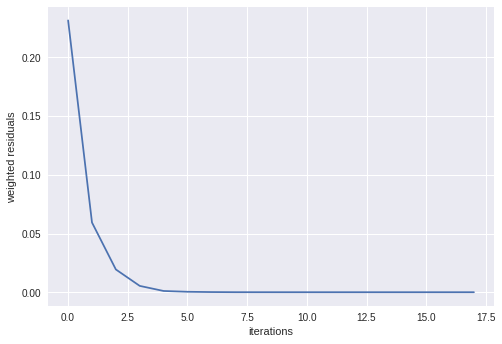

--------------------------------------------------------------
--------------------------------------------------------------
Convergence will not be reached because rho(I-invD*A)>=1.
Try other methods.


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
#TODO: moving this cell to Result section and add examples
# ex taken from https://s-mat-pcs.oulu.fi/~mpa/matreng/et55_60.htm

A= [[2,  7,  1],
    [4,  1, -1],
    [1, -3, 12]]

b= [[19],
    [ 3],
    [31]]


x, res, wres= jacobiIteration(A,b,[[0],[0],[0]],1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
A= [[2,  1, 1],
    [1,  2, 1],
    [1,  1, 2]]

b= [[ 4],
    [ 4],
    [ 4]]

x, res, wres= jacobiIteration(A,b,[[0],[0],[0]],1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

## Gauss-Seidel iteration

In [0]:
# ex taken from https://s-mat-pcs.oulu.fi/~mpa/matreng/et55_60.htm

A= [[2,  7,  1],
    [4,  1, -1],
    [1, -3, 12]]

b= [[19],
    [ 3],
    [31]]

x, res, wres= gaussSeidelIteration(A,b,[[0],[0],[0]],1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
A= [[2,  1, 1],
    [1,  2, 1],
    [1,  1, 2]]

b= [[ 4],
    [ 4],
    [ 4]]

x, res, wres= gaussSeidelIteration(A,b,[[0],[0],[0]],1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

## Newton's method for scalar nonlinear equation

In [0]:
def f(x):
  return np.e**x -x - 2

x, res= newtonScalarNLeq(f,-2)

print('f(x={})= {}'.format(x,f(x)))
print('res= ',res)
plt.figure()
plt.plot([x for x in range(0,len(res))],res)
plt.xlabel('iterations')
plt.ylabel('|f(x)|')

plt.show()

## GMRES method

In [0]:
A= [[2,  7,  1],
    [4,  1, -1],
    [1, -3, 12]]

b= [[19],
    [ 3],
    [31]]

x, res, wres= GMRESiteration(A,b,tol=1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

print('--------------------------------------------------------------')
print('--------------------------------------------------------------')
A= [[2,  1, 1],
    [1,  2, 1],
    [1,  1, 2]]

b= [[ 4],
    [ 4],
    [ 4]]

x, res, wres= GMRESiteration(A,b,tol=1e-10)
print('x.T=',x.T)
print('res=', res)

plt.figure
plt.plot([x for x in range(0,len(res))],wres)
plt.xlabel('iterations')
plt.ylabel('weighted residuals')
plt.show()

## Newton's method for vector nonlinear equation

In [0]:
def funVect(var):
  if not isinstance(var,np.ndarray):
    var= np.array(var)
  
  fun1= var[0]*var[1] + 2*var[1]
  fun2= var[0] + var[1]
  fun3= var[1]*math.log(var[2]+1) - 10
  
  vect= [fun1,
         fun2,
         fun3]
  
  vect= np.array(vect)
  
  return vect


x, res= newtonNLsystems(funVect,[[1],[2],[4]],tol=1e-10)

print('x.T=',x.T)
print('res=', res)

plt.figure()
plt.plot([x for x in range(0,len(res))],res)
plt.xlabel('iterations')
plt.ylabel('||fun(x)||')
plt.show()

# **Discussion**

Summarize your results and your conclusions. Were the results expected or surprising. Do your results have implications outside the particular problem investigated in this report? 

# References

[1] from Lecture Note, *Iterative methods, chapter 7*, pg. 93

[2] from Wikipedia, *[Jacobi method](https://en.wikipedia.org/wiki/Jacobi_method)*